The "FinTech" company launch there android and iOS mobile base app and want to grow there business. 
But there is problem how to recomended this app and offer who realy want to use it. 
So for that company desided to give free trial to each and every customer for 24 houre
and collect data from the customers. In this senariao some customer purchase the app and someone not.
According to this data company want to give special offer to the customer who are not interested to buy without offer
and grow thre business.

 This is classification problem


# Import essential libraries

In [6]:
import numpy as np; 
import pandas as pd; 
import matplotlib.pyplot as plt; 
import seaborn as sns; 
from dateutil import parser;

In [8]:
#importing data
fineTech_appData = pd.read_csv("FineTech_appData.csv");
print(fineTech_appData);

         user               first_open  dayofweek       hour  age  \
0      235136  2012-12-27 02:14:51.273          3   02:00:00   23   
1      333588  2012-12-02 01:16:00.905          6   01:00:00   24   
2      254414  2013-03-19 19:19:09.157          1   19:00:00   23   
3      234192  2013-07-05 16:08:46.354          4   16:00:00   28   
4       51549  2013-02-26 18:50:48.661          1   18:00:00   31   
...       ...                      ...        ...        ...  ...   
49995  222774  2013-05-09 13:46:17.871          3   13:00:00   32   
49996  169179  2013-04-09 00:05:17.823          1   00:00:00   35   
49997  302367  2013-02-20 22:41:51.165          2   22:00:00   39   
49998  324905  2013-04-28 12:33:04.288          6   12:00:00   27   
49999   27047  2012-12-14 01:22:44.638          4   01:00:00   25   

                                             screen_list  numscreens  \
0      idscreen,joinscreen,Cycle,product_review,ScanP...          15   
1      joinscreen,product_r

In [9]:
shape_result=fineTech_appData.shape;
print("no of row:",shape_result[0]);
print("no of column:",shape_result[1]);

no of row: 50000
no of column: 12


In [16]:
#print top 5 row
fineTech_appData.head(5); 

In [17]:
#print bottom 5 row
fineTech_appData.tail(5);

In [19]:
#checking null datavalue in dataframe
print(fineTech_appData.isnull().sum());

user                        0
first_open                  0
dayofweek                   0
hour                        0
age                         0
screen_list                 0
numscreens                  0
minigame                    0
used_premium_feature        0
enrolled                    0
enrolled_date           18926
liked                       0
dtype: int64


In [20]:
#brief information about dataset
fineTech_appData.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   user                  50000 non-null  int64 
 1   first_open            50000 non-null  object
 2   dayofweek             50000 non-null  int64 
 3   hour                  50000 non-null  object
 4   age                   50000 non-null  int64 
 5   screen_list           50000 non-null  object
 6   numscreens            50000 non-null  int64 
 7   minigame              50000 non-null  int64 
 8   used_premium_feature  50000 non-null  int64 
 9   enrolled              50000 non-null  int64 
 10  enrolled_date         31074 non-null  object
 11  liked                 50000 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 4.6+ MB


In [21]:
#provide the distribution of numerical variables 
fineTech_appData.describe();

In [22]:
#retrieve the unique value of each columns and it's length
columns_name = fineTech_appData.columns
for i in columns_name:
    print("""Unique value of {}\n{}\nlen is {} \n
          """.format(i, fineTech_appData[i].unique(), len(fineTech_appData[i].unique())));

Unique value of user
[235136 333588 254414 ... 302367 324905  27047]
len is 49874 

          
Unique value of first_open
['2012-12-27 02:14:51.273' '2012-12-02 01:16:00.905'
 '2013-03-19 19:19:09.157' ... '2013-02-20 22:41:51.165'
 '2013-04-28 12:33:04.288' '2012-12-14 01:22:44.638']
len is 49747 

          
Unique value of dayofweek
[3 6 1 4 2 0 5]
len is 7 

          
Unique value of hour
[' 02:00:00' ' 01:00:00' ' 19:00:00' ' 16:00:00' ' 18:00:00' ' 09:00:00'
 ' 03:00:00' ' 14:00:00' ' 04:00:00' ' 11:00:00' ' 06:00:00' ' 21:00:00'
 ' 05:00:00' ' 17:00:00' ' 20:00:00' ' 00:00:00' ' 22:00:00' ' 10:00:00'
 ' 08:00:00' ' 15:00:00' ' 13:00:00' ' 23:00:00' ' 12:00:00' ' 07:00:00']
len is 24 

          
Unique value of age
[ 23  24  28  31  20  35  26  29  39  32  25  17  21  55  38  27  48  37
  22  36  30  58  40  33  57  19  45  34  46  56  42  43  41  47  18  53
  44  49  60  50  52  62  63  16  54  70  51  69  68  59  76  75  66  61
  72  65  90  64  67  73  77  71  74  89  78  86

In [23]:
fineTech_appData.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                    object
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [24]:
#  hour data convert string to int
fintech_hour_c=fineTech_appData.hour.str.slice(1,3);
print(fintech_hour_c);
print("next");
fineTech_appData['hour'] =fintech_hour_c.astype(int);
print(fineTech_appData.head(5)); 

0        02
1        01
2        19
3        16
4        18
         ..
49995    13
49996    00
49997    22
49998    12
49999    01
Name: hour, Length: 50000, dtype: object
next
     user               first_open  dayofweek  hour  age  \
0  235136  2012-12-27 02:14:51.273          3     2   23   
1  333588  2012-12-02 01:16:00.905          6     1   24   
2  254414  2013-03-19 19:19:09.157          1    19   23   
3  234192  2013-07-05 16:08:46.354          4    16   28   
4   51549  2013-02-26 18:50:48.661          1    18   31   

                                         screen_list  numscreens  minigame  \
0  idscreen,joinscreen,Cycle,product_review,ScanP...          15         0   
1  joinscreen,product_review,product_review2,Scan...          13         0   
2                                  Splash,Cycle,Loan           3         0   
3  product_review,Home,product_review,Loan3,Finan...          40         0   
4  idscreen,joinscreen,Cycle,Credit3Container,Sca...          32       

In [26]:
# get data type of each columns
print(fineTech_appData.dtypes);

In [27]:
print(fineTech_appData.columns);

Index(['user', 'first_open', 'dayofweek', 'hour', 'age', 'screen_list',
       'numscreens', 'minigame', 'used_premium_feature', 'enrolled',
       'enrolled_date', 'liked'],
      dtype='object')


In [28]:
# drop object dtype columns
fineTech_appData2 = fineTech_appData.drop(['user', 'first_open', 'screen_list', 'enrolled_date'], axis = 1);

In [29]:
fineTech_appData2.head(6);

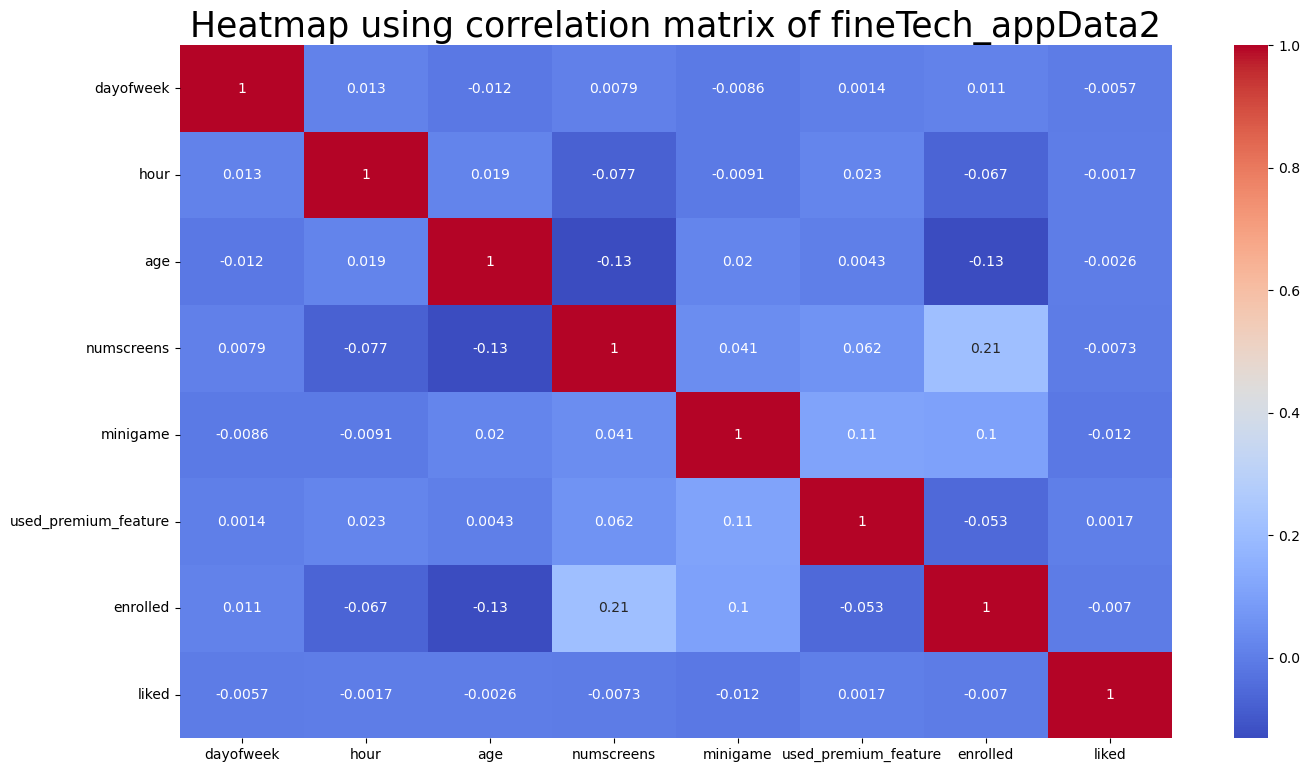

In [30]:
# Heatmap
plt.figure(figsize=(16,9));
sns.heatmap(fineTech_appData2.corr(), annot = True, cmap ='coolwarm');
# title of heatmap
plt.title("Heatmap using correlation matrix of fineTech_appData2", fontsize = 25); 

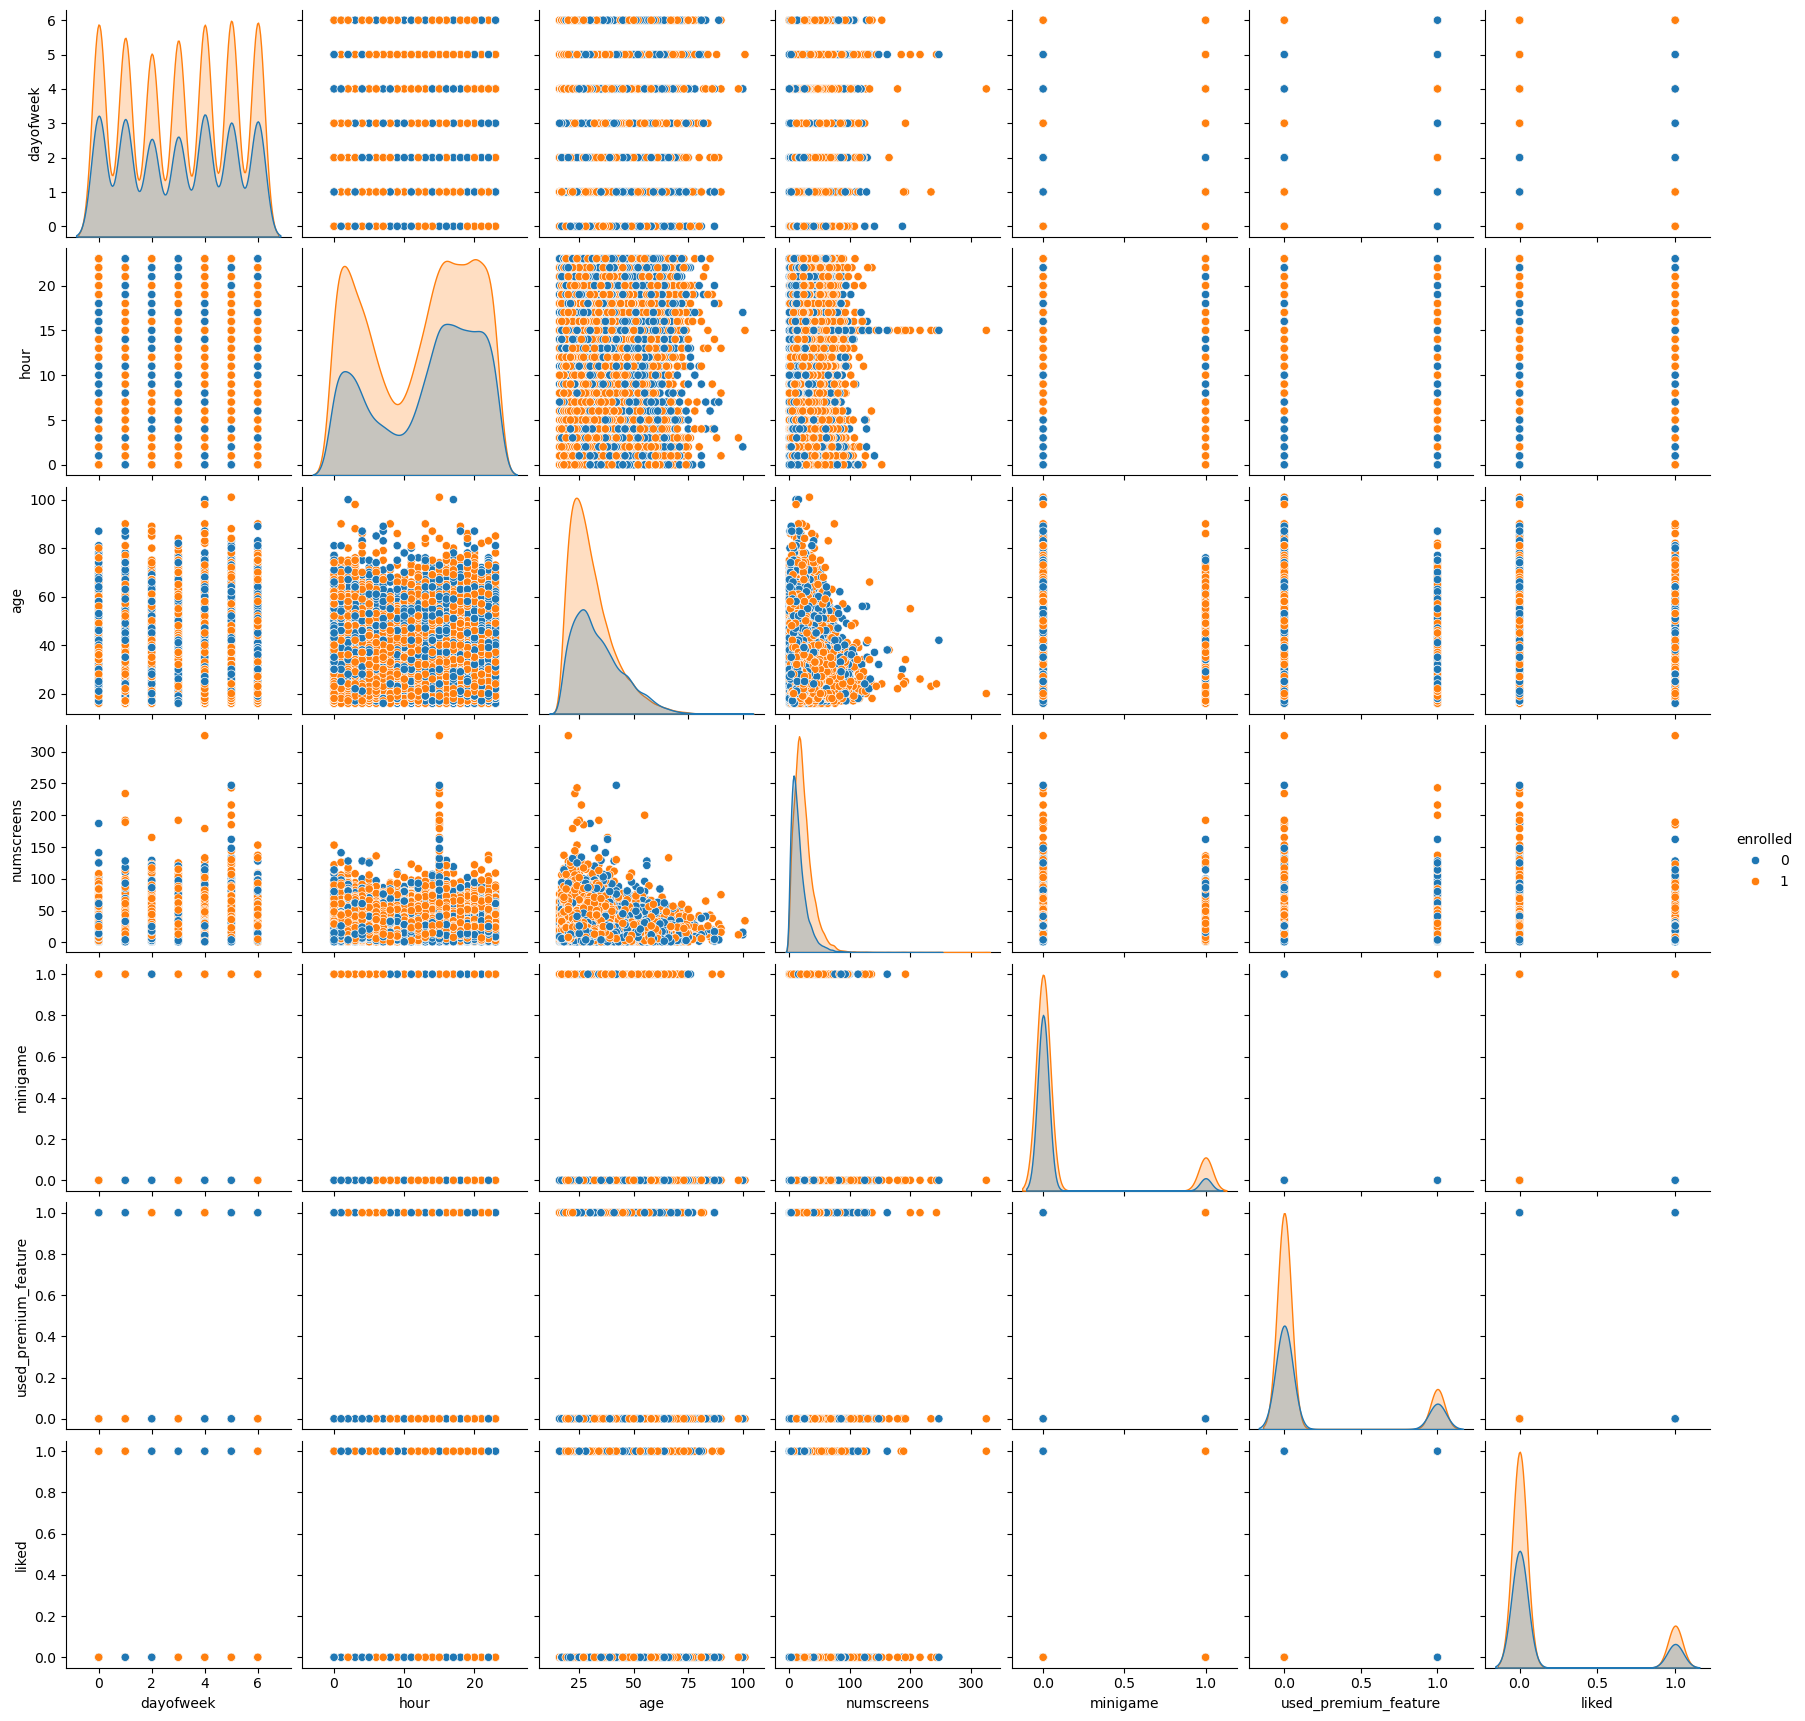

In [31]:
# Pailplot of fineTech_appData2 Dataset
sns.pairplot(fineTech_appData2, hue = 'enrolled',kind='scatter');

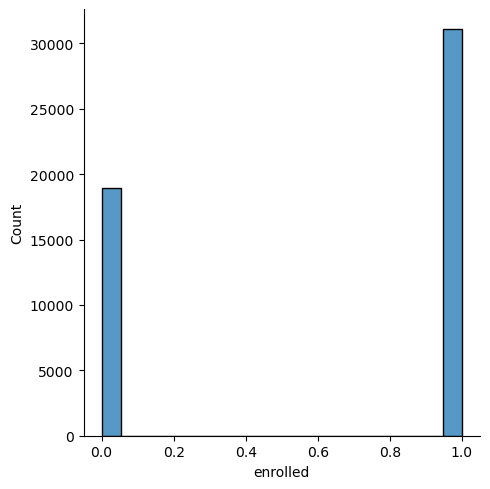

In [35]:
# Show counterplot of 'enrolled' feature
sns.displot(fineTech_appData.enrolled);

In [34]:
# value enrolled and not enrolled customers
print("Not enrolled user = ", (fineTech_appData.enrolled < 1).sum(), "out of 50000");
print("Enrolled user = ",50000-(fineTech_appData.enrolled <1).sum(),  "out of 50000");

Not enrolled user =  18926 out of 50000
Enrolled user =  31074 out of 50000


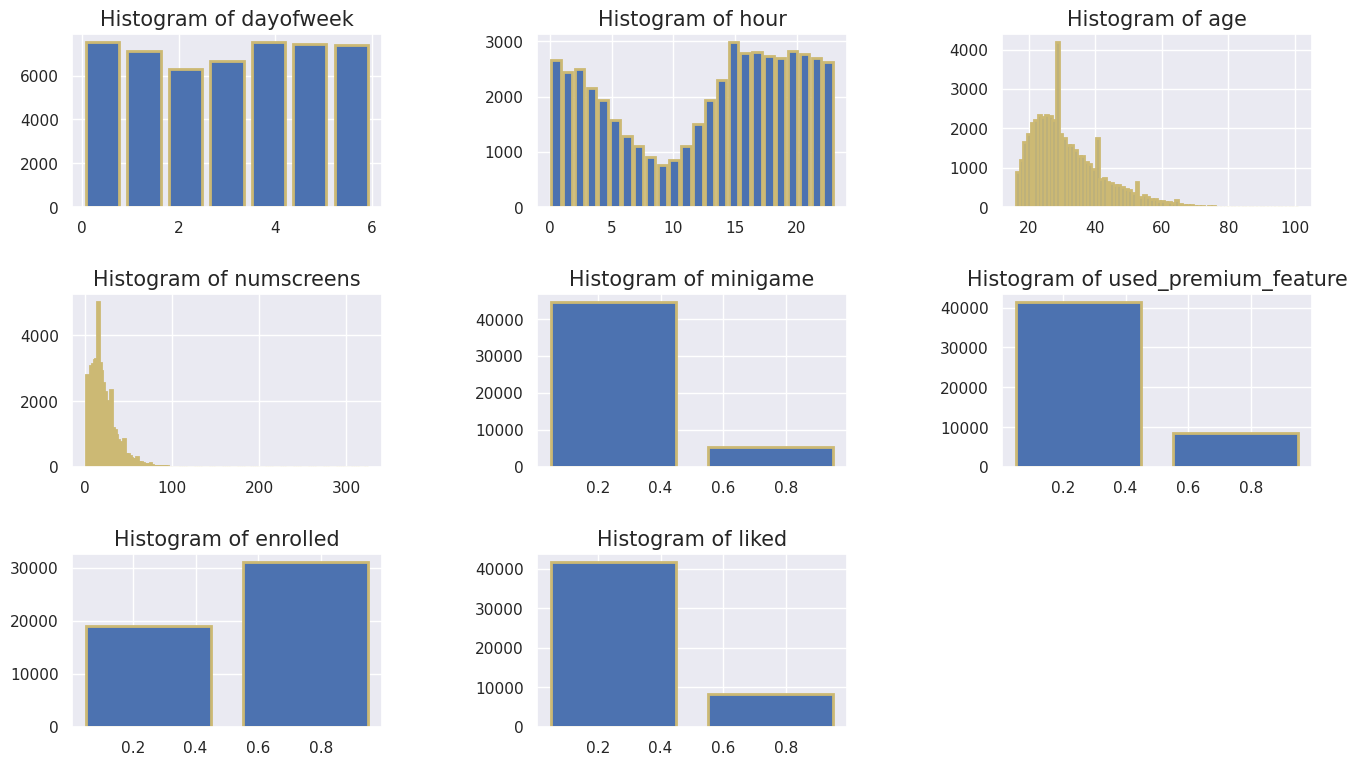

In [40]:
# plot histogram 
plt.figure(figsize = (16,9));
features = fineTech_appData2.columns;
for i,j in enumerate(features): 
    # create subplot for histogram
    plt.subplot(3,3,i+1);
    # title of histogram
    plt.title("Histogram of {}".format(j), fontsize = 15);
    # bins for histogram
    bins = len(fineTech_appData2[j].unique());
    # plot histogram
    plt.hist(fineTech_appData2[j], bins = bins, rwidth = 0.8, edgecolor = "y", linewidth = 2);
#space between horixontal axes (subplots)
plt.subplots_adjust(hspace=0.5,wspace=0.5);

In [41]:
for i,j in enumerate(features):
    print(i,j)

0 dayofweek
1 hour
2 age
3 numscreens
4 minigame
5 used_premium_feature
6 enrolled
7 liked


fintech data 3
       dayofweek  hour  age  numscreens  minigame  used_premium_feature  liked
0              3     2   23          15         0                     0      0
1              6     1   24          13         0                     0      0
2              1    19   23           3         0                     1      1
3              4    16   28          40         0                     0      0
4              1    18   31          32         0                     0      1
...          ...   ...  ...         ...       ...                   ...    ...
49995          3    13   32          13         0                     0      0
49996          1     0   35           4         0                     1      0
49997          2    22   39          25         0                     0      0
49998          6    12   27          26         0                     0      0
49999          4     1   25          26         0                     0      1

[50000 rows x 7 columns]

fintech da

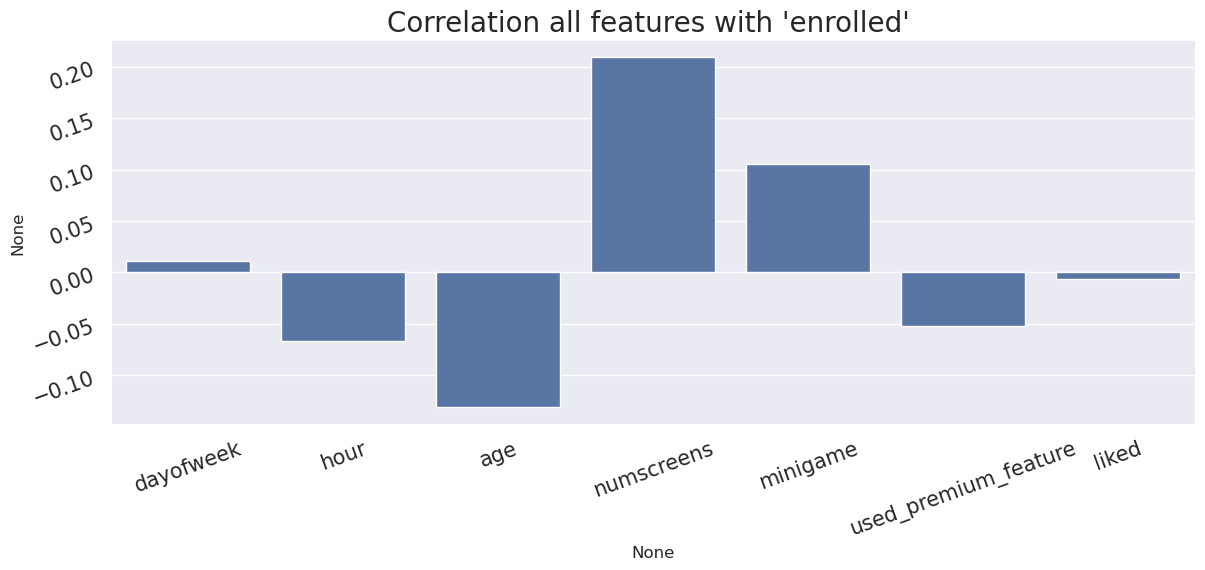

In [47]:
# show corelation barplot 
# set background dark grid
sns.set();
plt.figure(figsize = (14,5))
plt.title("Correlation all features with 'enrolled' ", fontsize = 20)
# drop 'enrolled' feature
fineTech_appData3 = fineTech_appData2.drop(['enrolled'], axis = 1);
print("fintech data 3");
print(fineTech_appData3);
print();
print("fintech data 2");
print(fineTech_appData2);
print();
print("next");
print();
print(fineTech_appData3.corrwith(fineTech_appData2.enrolled));
print();
# plot barplot
ax =sns.barplot(x=fineTech_appData3.columns,y=fineTech_appData3.corrwith(fineTech_appData2.enrolled)); 
# decorate x & y ticks font 
ax.tick_params(labelsize=15, labelrotation = 20, color ="k");

In [48]:
# parsing object data into data time format
fineTech_appData['first_open'] =[parser.parse(i) for i in fineTech_appData['first_open']];
print(fineTech_appData['first_open']);

0       2012-12-27 02:14:51.273
1       2012-12-02 01:16:00.905
2       2013-03-19 19:19:09.157
3       2013-07-05 16:08:46.354
4       2013-02-26 18:50:48.661
                  ...          
49995   2013-05-09 13:46:17.871
49996   2013-04-09 00:05:17.823
49997   2013-02-20 22:41:51.165
49998   2013-04-28 12:33:04.288
49999   2012-12-14 01:22:44.638
Name: first_open, Length: 50000, dtype: datetime64[ns]


In [ ]:
fineTech_appData['enrolled_date'] =[parser.parse(i) if isinstance(i, str) else i for i in fineTech_appData['enrolled_date']]

In [ ]:
fineTech_appData.dtypes

In [ ]:
fineTech_appData['time_to_enrolled']  = (fineTech_appData.enrolled_date - fineTech_appData.first_open).astype('timedelta64[h]')

In [ ]:
# plot histogram
plt.hist(fineTech_appData['time_to_enrolled'].dropna()) # *****code 10

In [ ]:
# Plot histogram
plt.hist(fineTech_appData['time_to_enrolled'].dropna(), range = (0,100)) # *****code 11

In [ ]:
# Those customers have enrolled after 48 hours set as 0
fineTech_appData.loc[fineTech_appData.time_to_enrolled > 48, 'enrolled'] = 0

In [ ]:
fineTech_appData

In [ ]:
fineTech_appData.drop(columns = ['time_to_enrolled', 'enrolled_date', 'first_open'], inplace=True)

In [ ]:
fineTech_appData

In [ ]:
# read csv file and convert it into numpy array
fineTech_app_screen_Data = pd.read_csv("Dataset/FineTech appData/top_screens.csv").top_screens.values

In [ ]:
fineTech_app_screen_Data

In [ ]:
type(fineTech_app_screen_Data)

In [ ]:
# Add ',' at the end of each string of  'sreen_list' for further operation.
fineTech_appData['screen_list'] = fineTech_appData.screen_list.astype(str) + ','

In [ ]:
fineTech_appData

In [ ]:
# string into to number

for screen_name in fineTech_app_screen_Data:
    fineTech_appData[screen_name] = fineTech_appData.screen_list.str.contains(screen_name).astype(int)
    fineTech_appData['screen_list'] = fineTech_appData.screen_list.str.replace(screen_name+",", "")

In [ ]:
# test
fineTech_appData.screen_list.str.contains('Splash').astype(int)

In [ ]:
# test
fineTech_appData.screen_list.str.replace('Splash'+",", "")

In [ ]:
# get shape
fineTech_appData.shape

In [ ]:
# head of DataFrame
fineTech_appData.head(6) # *****code 12

In [ ]:
# remain screen in 'screen_list'
fineTech_appData.loc[0,'screen_list']

In [ ]:
fineTech_appData.screen_list.str.count(",").head(6)

In [ ]:
# count remain screen list and store counted number in 'remain_screen_list'

fineTech_appData['remain_screen_list'] = fineTech_appData.screen_list.str.count(",")

In [ ]:
# Drop the 'screen_list'
fineTech_appData.drop(columns = ['screen_list'], inplace=True)

In [ ]:
fineTech_appData

In [ ]:
# total columns
fineTech_appData.columns

In [ ]:
# take sum of all saving screen in one place
saving_screens = ['Saving1',
                  'Saving2',
                  'Saving2Amount',
                  'Saving4',
                  'Saving5',
                  'Saving6',
                  'Saving7',
                  'Saving8',
                  'Saving9',
                  'Saving10',
                 ]
fineTech_appData['saving_screens_count'] = fineTech_appData[saving_screens].sum(axis = 1)
fineTech_appData.drop(columns = saving_screens, inplace = True)

In [ ]:
fineTech_appData

In [ ]:
credit_screens = ['Credit1',
                  'Credit2',
                  'Credit3',
                  'Credit3Container',
                  'Credit3Dashboard',
                 ]
fineTech_appData['credit_screens_count'] = fineTech_appData[credit_screens].sum(axis = 1)
fineTech_appData.drop(columns = credit_screens, axis = 1, inplace = True)

In [ ]:
fineTech_appData

In [ ]:
cc_screens = ['CC1',
              'CC1Category',
              'CC3',
             ]
fineTech_appData['cc_screens_count'] = fineTech_appData[cc_screens].sum(axis = 1)
fineTech_appData.drop(columns = cc_screens, inplace = True)

In [ ]:
fineTech_appData

In [ ]:
loan_screens = ['Loan',
                'Loan2',
                'Loan3',
                'Loan4',
               ]
fineTech_appData['loan_screens_count'] = fineTech_appData[loan_screens].sum(axis = 1)
fineTech_appData.drop(columns = loan_screens, inplace = True)

In [ ]:
fineTech_appData

In [ ]:
fineTech_appData.shape

In [ ]:
fineTech_appData.info()

In [ ]:
fineTech_appData.describe()

## Heatmap with correlation matrix of new fineTech_appData

In [ ]:
# Heatmap with correlation matrix of new fineTech_appData

plt.figure(figsize = (25,16)) 
sns.heatmap(fineTech_appData.corr(), annot = True, linewidth =2) #*****code 13

In [ ]:
fineTech_appData.columns

In [ ]:
fineTech_appData['ProfileChildren '].unique()

In [ ]:
corr_matrix = fineTech_appData.corr()
corr_matrix['ProfileChildren ']

In [ ]:
fineTech_appData['ProfileChildren ']

# Data Preprocessing

## Split dataset in Train and Test

In [ ]:
clean_fineTech_appData = fineTech_appData
target = fineTech_appData['enrolled'] 
fineTech_appData.drop(columns = 'enrolled', inplace = True)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(fineTech_appData, target, test_size = 0.2, random_state = 0)

In [ ]:
print('Shape of X_train = ', X_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of y_test = ', y_test.shape)

In [ ]:
# take User ID in another variable 
train_userID = X_train['user']
X_train.drop(columns= 'user', inplace =True)
test_userID = X_test['user']
X_test.drop(columns= 'user', inplace =True)

In [ ]:
print('Shape of X_train = ', X_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of train_userID = ', train_userID.shape)
print('Shape of test_userID = ', test_userID.shape)


# Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

# Model Building

In [ ]:
# impoer requiede packages
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Decision Tree

In [ ]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion= 'entropy', random_state=0)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

accuracy_score(y_test, y_pred_dt)

In [ ]:
# train with Standert Scaling dataset
dt_model2 = DecisionTreeClassifier(criterion= 'entropy', random_state=0)
dt_model2.fit(X_train_sc, y_train)
y_pred_dt_sc = dt_model2.predict(X_test_sc)

accuracy_score(y_test, y_pred_dt_sc)

# K-NN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2,)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

accuracy_score(y_test, y_pred_knn)

In [ ]:
# train with Standert Scaling dataset
knn_model2 = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2,)
knn_model2.fit(X_train_sc, y_train)
y_pred_knn_sc = knn_model2.predict(X_test_sc)

accuracy_score(y_test, y_pred_knn_sc)

# Naive Bayes

In [ ]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

accuracy_score(y_test, y_pred_nb)

In [ ]:
# train with Standert Scaling dataset
nb_model2 = GaussianNB()
nb_model2.fit(X_train_sc, y_train)
y_pred_nb_sc = nb_model2.predict(X_test_sc)

accuracy_score(y_test, y_pred_nb_sc)

# Random Forest

In [ ]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

accuracy_score(y_test, y_pred_rf)

In [ ]:
# train with Standert Scaling dataset
rf_model2 = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
rf_model2.fit(X_train_sc, y_train)
y_pred_rf_sc = rf_model2.predict(X_test_sc)

accuracy_score(y_test, y_pred_rf_sc)

# Logistic Regression

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(random_state = 0, penalty = 'l1')
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

accuracy_score(y_test, y_pred_lr)

In [ ]:
# train with Standert Scaling dataset
lr_model2 = LogisticRegression(random_state = 0, penalty = 'l1')
lr_model2.fit(X_train_sc, y_train)
y_pred_lr_sc = lr_model2.predict(X_test_sc)

accuracy_score(y_test, y_pred_lr_sc)

# Support Vector Machine

In [ ]:
# Support Vector Machine
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)

accuracy_score(y_test, y_pred_svc)

In [ ]:
# train with Standert Scaling dataset
svc_model2 = SVC()
svc_model2.fit(X_train_sc, y_train)
y_pred_svc_sc = svc_model2.predict(X_test_sc)

accuracy_score(y_test, y_pred_svc_sc)

# XGBoost

In [ ]:
# XGBoost Classifier
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

accuracy_score(y_test, y_pred_xgb)

In [ ]:
# train with Standert Scaling dataset
xgb_model2 = XGBClassifier()
xgb_model2.fit(X_train_sc, y_train)
y_pred_xgb_sc = xgb_model2.predict(X_test_sc)

accuracy_score(y_test, y_pred_xgb_sc)

In [ ]:
# XGB classifier with parameter tuning
xgb_model_pt1 = XGBClassifier(
 learning_rate =0.01,
 n_estimators=5000,
 max_depth=4,
 min_child_weight=6,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 reg_alpha=0.005,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

xgb_model_pt1.fit(X_train, y_train)
y_pred_xgb_pt1 = xgb_model_pt1.predict(X_test)

accuracy_score(y_test, y_pred_xgb_pt1)

In [ ]:
# XGB classifier with parameter tuning
# train with Standert Scaling dataset
xgb_model_pt2 = XGBClassifier(
 learning_rate =0.01,
 n_estimators=5000,
 max_depth=4,
 min_child_weight=6,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 reg_alpha=0.005,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

xgb_model_pt2.fit(X_train_sc, y_train)
y_pred_xgb_sc_pt2 = xgb_model_pt2.predict(X_test_sc)

accuracy_score(y_test, y_pred_xgb_sc_pt2)

In [ ]:
# confussion matrix
cm_xgb_pt2 = confusion_matrix(y_test, y_pred_xgb_sc_pt2)
sns.heatmap(cm_xgb_pt2, annot = True, fmt = 'g')
plt.title("Confussion Matrix", fontsize = 20)  # *****code 14

In [ ]:
# Clasification Report
cr_xgb_pt2 = classification_report(y_test, y_pred_xgb_sc_pt2)

print("Classification report >>> \n", cr_xgb_pt2)

In [ ]:
# Cross validation
from sklearn.model_selection import cross_val_score
cross_validation = cross_val_score(estimator = xgb_model_pt2, X = X_train_sc, y = y_train, cv = 10)
print("Cross validation of XGBoost model = ",cross_validation)
print("Cross validation of XGBoost model (in mean) = ",cross_validation.mean())

# Mapping predicted output to the target

In [ ]:
final_result = pd.concat([test_userID, y_test], axis = 1)
final_result['predicted result'] = y_pred_xgb_sc_pt2

final_result

# Save the Model

In [ ]:
## Pickle
import pickle

# save model
pickle.dump(xgb_model_pt2, open('FineTech_app_ML_model.pickle', 'wb'))

# load model
ml_model_pl = pickle.load(open('FineTech_app_ML_model.pickle', 'rb'))

# predict the output
y_pred_pl = ml_model_pl.predict(X_test_sc)

# confusion matrix
cm_pl = confusion_matrix(y_test, y_pred_pl)
print('Confussion matrix = \n', cm_pl)

# show the accuracy
print("Accuracy of model = ",accuracy_score(y_test, y_pred_pl))


In [ ]:
## Joblib
from sklearn.externals import joblib

# save model
joblib.dump(xgb_model_pt2, 'FineTech_app_ML_model.joblib')

# load model
ml_model_jl = joblib.load('FineTech_app_ML_model.joblib')

# predict the output 
y_pred_jl = ml_model_jl.predict(X_test_sc)

cm_jl = confusion_matrix(y_test, y_pred_jl)
print('Confussion matrix = \n', cm_jl)

print("Accuracy of model = ", accuracy_score(y_test, y_pred_jl))